In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving phishcoop.csv to phishcoop (1).csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('phishcoop.csv')
dataset = dataset.drop('id',1)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values
y = np.squeeze(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [ ]:
k_list = [3,5,7,9,11]
accuracy_list = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

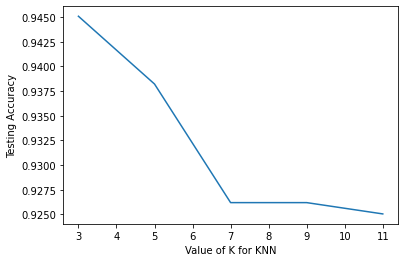

[0.9450800915331807, 0.9382151029748284, 0.9262013729977117, 0.9262013729977117, 0.9250572082379863]


In [ ]:
plt.plot(k_list, accuracy_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()
print(accuracy_list)

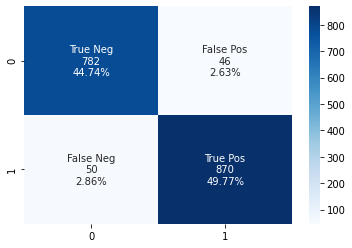

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')